# Stroke prediction with clasification models
Menurut Organisasi Kesehatan Dunia (WHO), stroke merupakan penyebab kematian nomor dua di dunia, bertanggung jawab atas sekitar 11% dari total kematian secara global. Dataset ini dirancang untuk memprediksi apakah seorang pasien berpotensi mengalami stroke berdasarkan parameter input seperti jenis kelamin, usia, riwayat penyakit, dan status merokok. Setiap baris dalam dataset menyediakan informasi relevan tentang pasien yang dapat digunakan untuk analisis prediktif.

Dataset ini sangat berguna dalam konteks kesehatan untuk mengidentifikasi faktor risiko stroke dan membangun model machine learning guna mendukung diagnosis dini. Dengan memahami isi dataset, kita dapat melangkah ke tahap eksplorasi data, preprocessing, dan pemodelan prediktif.

Dataset ini digunakan untuk memprediksi apakah seorang pasien berpotensi mengalami stroke berdasarkan parameter input seperti jenis kelamin, usia, riwayat penyakit, dan status merokok. Dataset ini sangat berguna dalam konteks kesehatan untuk mengidentifikasi faktor risiko stroke dan membangun model machine learning guna mendukung diagnosis dini.

## Import Libraries

In [29]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
library(pROC)

options(dplyr.width = Inf)
library(rpart)              
library(randomForest)       
library(e1071)              
library(nnet)               
library(pROC)               
library(caret)             
library(ROSE)               
library(rpart.plot)   

## Read Dataset

In [30]:
data <- read.csv("healthcare-dataset-stroke-data.csv")
head(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


## Information Dataset

In [31]:
str(data)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [32]:
summary(data)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

## Preprocessing

### Delete Columns Id

In [33]:
data$id <- NULL

In [34]:
# Hitung jumlah nilai unik per kolom
unique_counts <- sapply(data, function(x) length(unique(x)))

# Threshold untuk membedakan antara kolom kontinu dan kategorikal
threshold <- 10

# Mendapatkan nama kolom dengan jumlah nilai unik lebih dari threshold (kolom numerik)
num_cols <- names(unique_counts[unique_counts > threshold])

# Mendapatkan nama kolom dengan jumlah nilai unik kurang atau sama dengan threshold (kolom kategorikal)
cat_cols <- names(unique_counts[unique_counts <= threshold])

# Menghapus 'stroke' dari kolom kategorikal (jika ada)
cat_cols <- setdiff(cat_cols, "stroke")

# Mengkonversi kolom-kolom kategorikal menjadi tipe faktor
for(col in cat_cols) {
  data[[col]] <- as.factor(data[[col]])
}

cat_cols

[1] "gender"         "hypertension"   "heart_disease"  "ever_married"  
[5] "work_type"      "Residence_type" "smoking_status"

In [35]:
num_cols

[1] "age"               "avg_glucose_level" "bmi"

In [36]:
# Konversi kolom numerik ke tipe numeric
for (col in num_cols) {
  data[[col]] <- as.numeric(data[[col]])
}

# Cek jumlah nilai yang hilang di setiap kolom
sapply(data, function(x) sum(is.na(x)))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
              201                 0                 0

### Visualization Distribution BMI

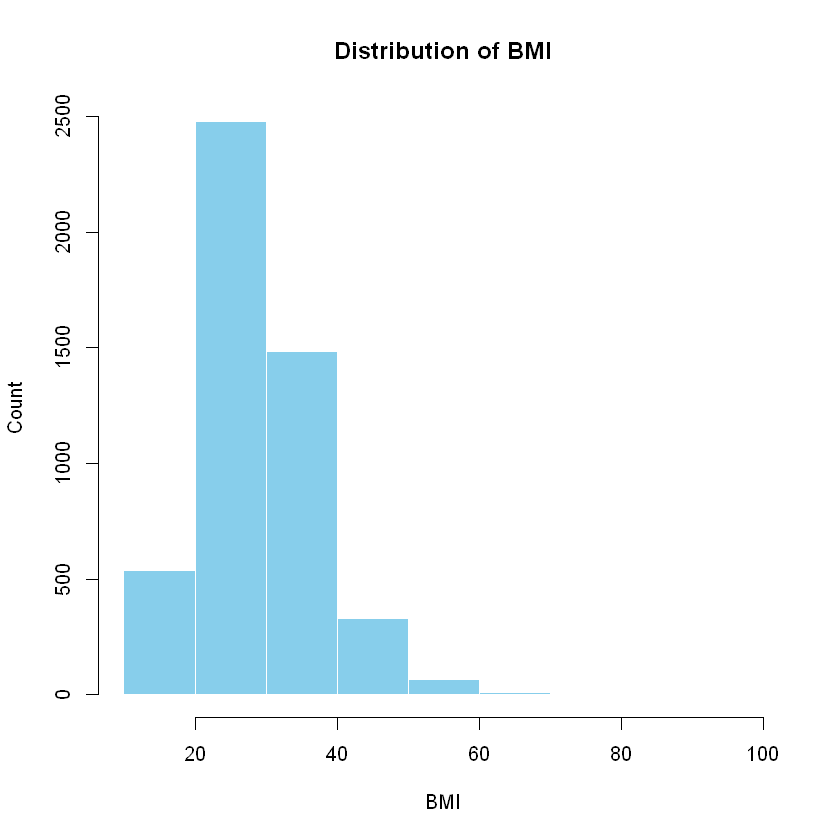

In [37]:
hist(data$bmi, breaks = 10, xlab = "BMI", ylab = "Count", main = "Distribution of BMI", col = "skyblue", border = "white")

 Distribusi nilai Body Mass Index (BMI) dalam sebuah dataset. Sumbu x(Horizontal) mewakili nilai BMI, berkisar dari 0 hingga 100, dengan garis grid utama pada interval 20 (0, 20, 40, 60, 80, 100), sedangkan sumbu y menunjukkan jumlah individu, berkisar dari 0 hingga 2500, dengan interval 500 (0, 500, 1000, 1500, 2000, 2500). Histogram ini terdiri dari bar-bar berwarna biru muda yang menggambarkan frekuensi individu dalam rentang nilai BMI tertentu. Data sebagian besar terkonsentrasi pada rentang BMI sekitar 20 hingga 50, dengan puncak tertinggi terletak di sekitar BMI 30, di mana jumlah individu mendekati 2500. Distribusi ini menunjukkan kemiringan ke kanan (right skew), ditandai dengan penurunan frekuensi yang gradual setelah puncak, dengan semakin sedikit individu yang memiliki BMI di atas 50. Hanya sedikit individu yang memiliki BMI mendekati 80, dan hampir tidak ada yang melebihi nilai tersebut, sebagaimana terlihat dari bar yang mengecil signifikan pada rentang BMI tinggi. Pola ini mengindikasikan bahwa dataset kemungkinan mewakili populasi dengan mayoritas individu memiliki BMI dalam kategori normal hingga overweight, dan hanya sebagian kecil yang termasuk dalam kategori obesitas atau obesitas ekstrem.

In [38]:
data$bmi[is.na(data$bmi)] <- median(data$bmi, na.rm = TRUE)

### Check Duplicate Values

In [39]:
sum(duplicated(data))

[1] 0

### Memastikan Variable Target menjadi kategorical

In [40]:
data$stroke <- as.factor(data$stroke)

### Distribusi Variable Target

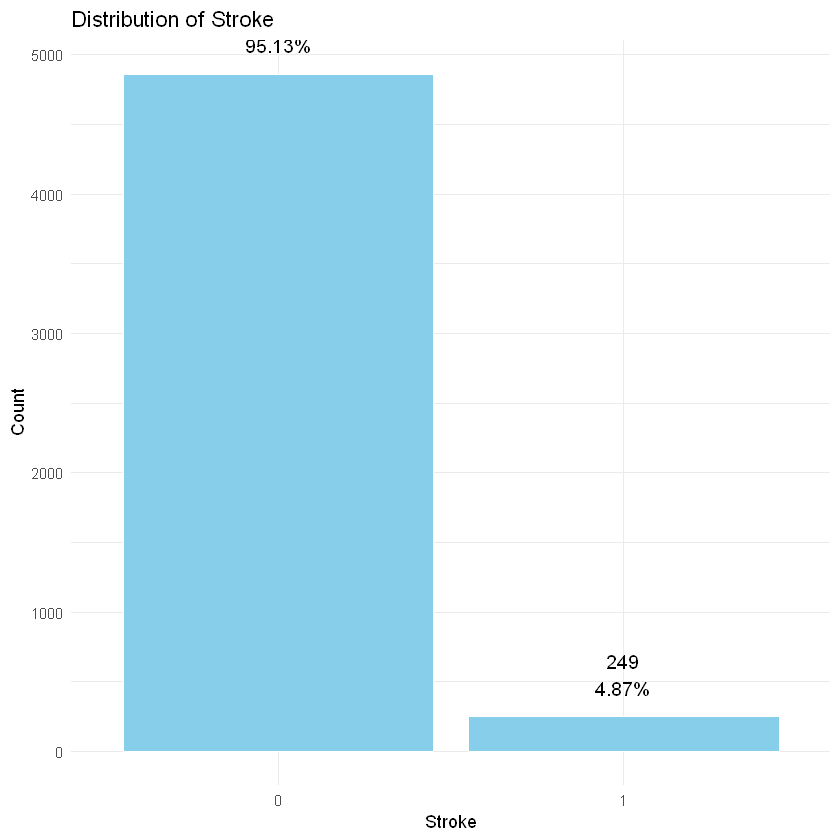

In [41]:
library(ggplot2)
library(dplyr)

# Hitung frekuensi untuk setiap kategori pada variabel 'stroke'
df_counts <- data %>%
  count(stroke) %>%
  mutate(percent = n / sum(n) * 100)

# Buat plot histogram untuk variabel 'stroke'
ggplot(data, aes(x = stroke)) +
  geom_bar(fill = "skyblue", color = "white") +
  # Tambahkan label untuk menampilkan jumlah dan persentase
  geom_text(data = df_counts, aes(label = paste0(n, "\n", round(percent, 2), "%"), y = n), 
            vjust = -0.5, size = 4) +
  labs(x = "Stroke", y = "Count", title = "Distribution of Stroke") +
  theme_minimal()

Ketidakseimbangan Kelas (Class Imbalance)
Histogram ini menunjukkan adanya ketidakseimbangan kelas yang signifikan, di mana kelas mayoritas (tidak ada stroke, 95.13%) jauh lebih dominan dibandingkan kelas minoritas (ada stroke, 4.87%). Ketidakseimbangan ini dapat menjadi tantangan dalam membangun model machine learning karena:

Model cenderung bias terhadap kelas mayoritas, sehingga sering kali gagal mendeteksi kelas minoritas (stroke) yang justru lebih kritis dalam konteks medis.
Tanpa penanganan khusus, model mungkin memiliki akurasi tinggi hanya karena memprediksi "tidak ada stroke" untuk sebagian besar kasus, tetapi gagal mengidentifikasi pasien yang benar-benar berisiko stroke.

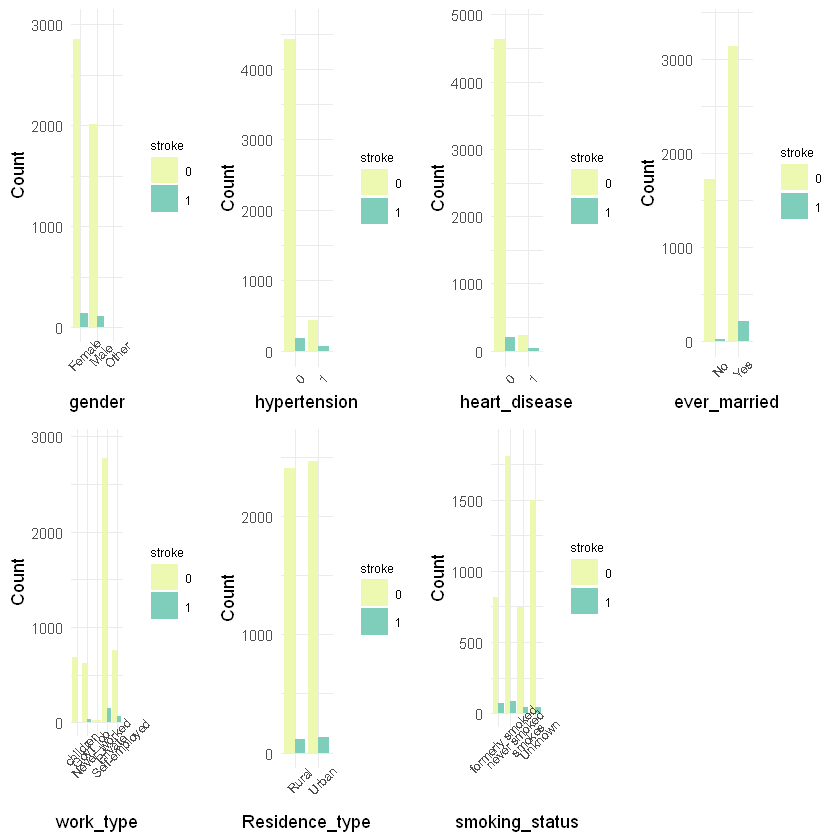

In [42]:
library(ggplot2)
library(gridExtra)

# Membuat list untuk menyimpan plot
plots <- list()

# Loop melalui setiap kolom kategorikal
for (i in seq_along(cat_cols)) {
  col_name <- cat_cols[i]
  # Hitung maksimum frekuensi untuk kolom ini, digunakan untuk setting batas sumbu-y
  max_count <- max(table(data[[col_name]]))
  
  p <- ggplot(data, aes_string(x = col_name, fill = "stroke")) +
    geom_bar(position = "dodge") +
    scale_fill_brewer(palette = "YlGnBu") +
    labs(x = col_name, y = "Count") +
    ylim(0, max_count + 10) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, size = 7),
          legend.text = element_text(size = 7),
          legend.title = element_text(size = 7))
  
  plots[[i]] <- p
}

# Menampilkan plot dalam 2 baris dan 4 kolom (sesuaikan jumlah kolom jika perlu)
grid.arrange(grobs = plots, nrow = 2, ncol = 4)

Visualisasi ini terdiri dari tujuh histogram yang menggambarkan distribusi variabel kategorikal dalam dataset terkait kejadian stroke, di mana kategori "0" mewakili individu tanpa stroke (ditandai dengan warna kuning) dan kategori "1" mewakili individu dengan stroke (ditandai dengan warna teal). Variabel yang dianalisis mencakup gender, hypertension, heart disease, ever married, work type, residence type, dan smoking status. Setiap histogram menunjukkan jumlah individu (count) pada sumbu y(Vertijkl) dan kategori variabel pada sumbu x. Ketidakseimbangan Kelas yang Jelas


## Indentify Outliers

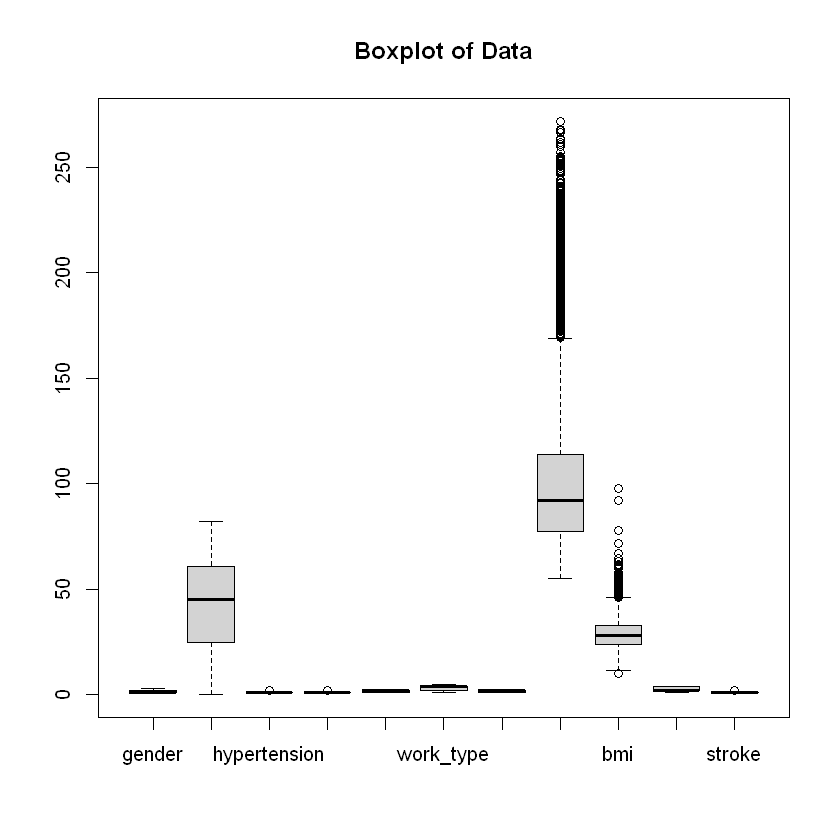

In [43]:
boxplot(data, main = "Boxplot of Data")

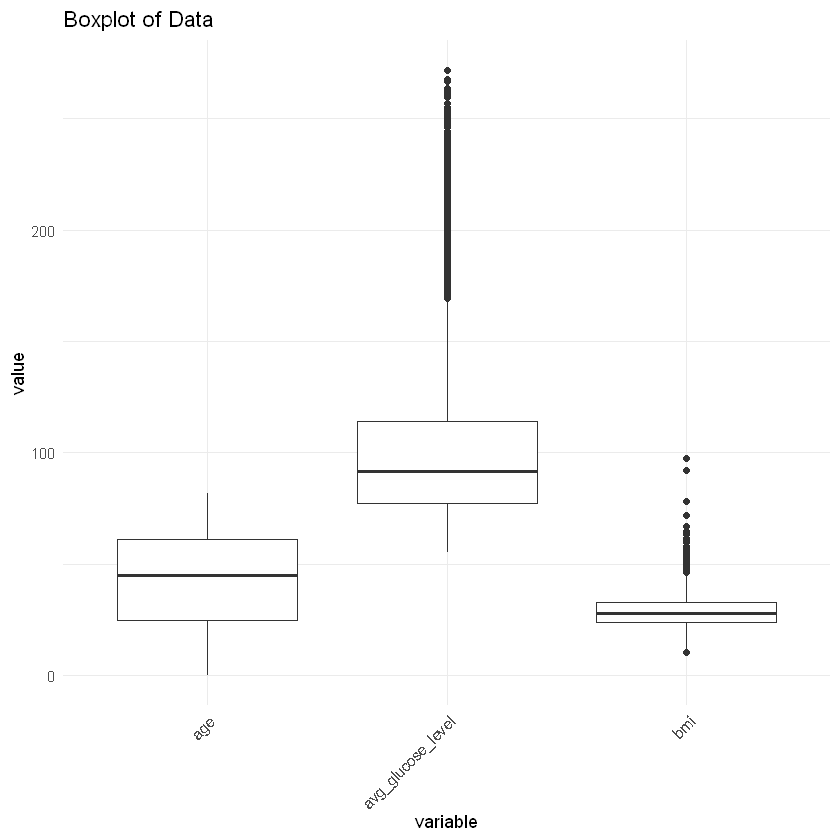

In [44]:
library(ggplot2)
library(reshape2)

# Ubah data ke format long, hanya untuk kolom numerik
data_long <- melt(data, measure.vars = num_cols)

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplot of Data") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###  Interpretasi Boxplot
interpretasi singkat untuk setiap variabel:

* **Age:** Distribusi usia terlihat relatif simetris. Kotak (yang mencakup 50% data) berada di rentang nilai yang cukup lebar, menunjukkan variasi usia dalam dataset. Tidak terlihat adanya outlier yang signifikan pada visualisasi ini.

* **Avg\_glucose\_level:** Distribusi tingkat glukosa rata-rata menunjukkan sebaran data yang lebih luas dibandingkan usia. Median (garis tengah dalam kotak) berada di sekitar nilai 90-100. Yang paling mencolok adalah adanya beberapa outlier dengan nilai glukosa yang sangat tinggi, yang ditunjukkan oleh titik-titik di atas whisker atas. Ini mengindikasikan adanya beberapa individu dengan tingkat glukosa yang jauh lebih tinggi dari mayoritas data.

* **BMI:** Distribusi Indeks Massa Tubuh (BMI) terlihat memiliki median di sekitar nilai 25. Sebaran data (panjang kotak) relatif lebih kecil dibandingkan tingkat glukosa. Terdapat juga beberapa outlier dengan nilai BMI yang lebih tinggi, meskipun tidak sebanyak pada variabel tingkat glukosa.

### Berapa banyak outlier?

In [45]:
for (var in c("avg_glucose_level", "bmi")) {
  percentile25 <- quantile(data[[var]], 0.25, na.rm = TRUE)
  percentile75 <- quantile(data[[var]], 0.75, na.rm = TRUE)
  iqr <- percentile75 - percentile25
  upper_limit <- percentile75 + 1.5 * iqr
  lower_limit <- percentile25 - 1.5 * iqr
  
  outliers <- data[data[[var]] > upper_limit | data[[var]] < lower_limit, ]
  
  cat(sprintf("Number of rows in the data containing outliers in %s: %d\n", 
              var, nrow(outliers)))
}

Number of rows in the data containing outliers in avg_glucose_level: 627
Number of rows in the data containing outliers in bmi: 126


### Remove Outliers

In [46]:
for (col in c("avg_glucose_level", "bmi")) {
  q1 <- quantile(data[[col]], 0.25, na.rm = TRUE)
  q3 <- quantile(data[[col]], 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  data <- data[data[[col]] >= lower_bound & data[[col]] <= upper_bound, ]
}

cat("Number of rows after removing outliers:", nrow(data), "\n")

Number of rows after removing outliers: 4383 


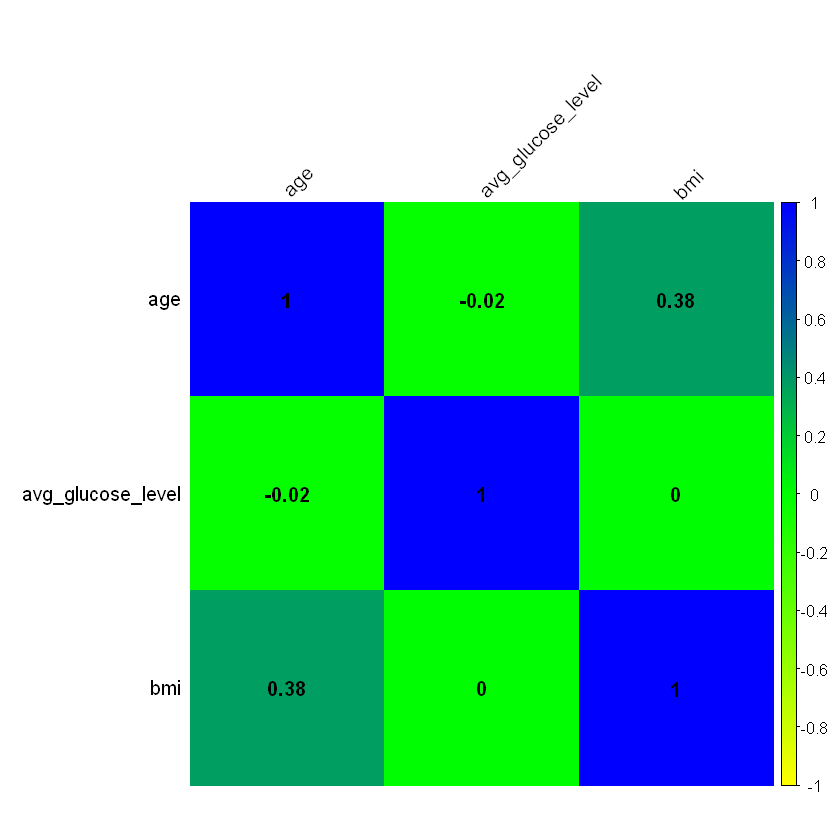

In [47]:
library(corrplot)

# Hitung matriks korelasi untuk kolom numerik
cor_matrix <- cor(data[, num_cols], use = "complete.obs")

# Plot heatmap korelasi
corrplot(cor_matrix, 
         method = "color", 
         col = colorRampPalette(c("yellow", "green", "blue"))(200), 
         addCoef.col = "black",    # Menambahkan nilai koefisien pada plot
         tl.col = "black",         # Warna label sumbu
         tl.srt = 45,              # Rotasi label sumbu
         mar = c(0,0,1,0))         # Margin plot

beberapa poin penting:

1. Usia dan BMI menunjukkan korelasi positif yang moderat. Ini mengindikasikan adanya kecenderungan, meskipun tidak terlalu kuat, bahwa seiring bertambahnya usia, BMI juga cenderung sedikit meningkat.                   

2. Hubungan antara usia dan tingkat glukosa rata-rata sangat lemah. Ini berarti tidak ada keterkaitan linier yang signifikan antara usia dan tingkat glukosa dalam data ini.                       

3. Tidak ada korelasi yang berarti antara tingkat glukosa rata-rata dan BMI. Ini menunjukkan bahwa dalam dataset ini, tingkat glukosa dan BMI tidak secara langsung mempengaruhi satu sama lain secara linier.

### Penanganan Imbalance Kelas dengan SMOTE


In [48]:
# Pilih kolom numerik dari data
df_num <- data[, num_cols, drop = FALSE]

# Terapkan standard scaling menggunakan fungsi scale()
df_num <- as.data.frame(scale(df_num))

In [49]:
library(caret)
dummy <- dummyVars(" ~ .", data = data[, cat_cols], fullRank = TRUE)
df_cat <- data.frame(predict(dummy, newdata = data[, cat_cols]))

In [50]:
X <- cbind(df_num, df_cat)
y <- data[, "stroke", drop = FALSE]

In [51]:
library(smotefamily)

# Gabungkan fitur (X) dan target (y) ke dalam satu data frame
data_combined <- cbind(X, stroke = y)
data_combined$stroke <- as.factor(data_combined$stroke)  # pastikan target bertipe faktor

# Hitung jumlah masing-masing kelas pada target
tbl <- table(data_combined$stroke)
majority <- max(tbl)
minority <- min(tbl)

# Hitung dup_size agar kelas minoritas dinaikkan hingga seimbang dengan mayoritas
dup_size <- round(majority / minority) - 1

# Terapkan SMOTE dengan parameter yang telah dihitung
smote_output <- SMOTE(
  X = data_combined[, setdiff(names(data_combined), "stroke")],
  target = data_combined$stroke,
  K = 5,
  dup_size = dup_size
)

# Hasil SMOTE terdapat pada properti 'data'
data_smote <- smote_output$data

# Pisahkan kembali fitur dan target
X_smote <- data_smote[, -ncol(data_smote)]
y_smote <- data_smote[, ncol(data_smote)]

cat("Number of rows after SMOTE:", nrow(data_smote), "\n")

Number of rows after SMOTE: 8483 


In [52]:
table(y_smote)

y_smote
   0    1 
4219 4264 

## Modeling Klasifikasi

In [53]:
library(caret)

set.seed(42)
trainIndex <- createDataPartition(y_smote, p = 0.75, list = FALSE)
X_train <- X_smote[trainIndex, ]
X_test  <- X_smote[-trainIndex, ]
y_train <- y_smote[trainIndex]
y_test  <- y_smote[-trainIndex]

In [54]:
get_test_scores <- function(model_name, preds, y_test_data, auc) {
  # Pastikan library caret sudah terinstal dan dimuat
  library(caret)
  
  # Ubah prediksi dan data aktual menjadi faktor
  preds <- as.factor(preds)
  y_test_data <- as.factor(y_test_data)
  
  # Hitung confusion matrix (pastikan mendefinisikan kelas positif jika diperlukan)
  cm <- confusionMatrix(preds, y_test_data, positive = "1")
  
  # Ekstrak metrik yang dibutuhkan
  precision <- cm$byClass["Precision"]
  recall <- cm$byClass["Recall"]
  f1_score <- cm$byClass["F1"]
  accuracy <- cm$overall["Accuracy"]
  
  # Buat data frame laporan
  report <- data.frame(
    Model = model_name,
    Precision = precision,
    Recall = recall,
    F1.Score = f1_score,
    Accuracy = accuracy,
    AUC = auc,
    row.names = NULL,
    stringsAsFactors = FALSE
  )
  
  return(report)
}

In [55]:
# Fungsi get_test_scores yang telah didefinisikan sebelumnya
get_test_scores <- function(model_name, preds, y_test_data, auc_val) {
  # Ubah prediksi dan data aktual ke factor
  preds <- as.factor(preds)
  y_test_data <- as.factor(y_test_data)
  
  # Menghitung confusion matrix (dengan asumsi kelas "1" sebagai positif)
  cm <- confusionMatrix(preds, y_test_data, positive = "1")
  
  # Ekstrak metrik dari confusion matrix
  precision <- cm$byClass["Precision"]
  recall <- cm$byClass["Recall"]
  f1_score <- cm$byClass["F1"]
  accuracy <- cm$overall["Accuracy"]
  
  # Buat data frame laporan
  report <- data.frame(
    Model = model_name,
    Precision = precision,
    Recall = recall,
    F1.Score = f1_score,
    Accuracy = accuracy,
    AUC = auc_val,
    stringsAsFactors = FALSE
  )
  
  return(report)
}

# Gabungkan data fitur dan target untuk training dan testing
train_data <- cbind(X_train, stroke = y_train)
test_data  <- cbind(X_test, stroke = y_test)

# Pastikan target (stroke) adalah faktor
train_data$stroke <- as.factor(train_data$stroke)
test_data$stroke  <- as.factor(test_data$stroke)

# Inisialisasi list untuk menyimpan metrik model
model_metrics <- list()

# 1. Logistic Regression
model_lr <- glm(stroke ~ ., data = train_data, family = binomial)
probs_lr <- predict(model_lr, newdata = test_data, type = "response")
y_pred_lr <- ifelse(probs_lr > 0.5, 1, 0)
cm_lr <- confusionMatrix(as.factor(y_pred_lr), test_data$stroke, positive = "1")
roc_obj_lr <- roc(as.numeric(as.character(test_data$stroke)), probs_lr)
auc_lr <- auc(roc_obj_lr)
test_score_lr <- get_test_scores("LogisticRegression", y_pred_lr, test_data$stroke, auc_lr)
model_metrics[["LogisticRegression"]] <- list(model = model_lr, y_pred = y_pred_lr,
                                               report = cm_lr, 
                                               fpr = rev(roc_obj_lr$specificities),  # spesifisitas di pROC terbalik
                                               tpr = roc_obj_lr$sensitivities,
                                               auc = auc_lr,
                                               test_score = test_score_lr)

# 2. Decision Tree Classifier
model_dt <- rpart(stroke ~ ., data = train_data, method = "class")
probs_dt <- predict(model_dt, newdata = test_data, type = "prob")[, "1"]
y_pred_dt <- ifelse(probs_dt > 0.5, 1, 0)
cm_dt <- confusionMatrix(as.factor(y_pred_dt), test_data$stroke, positive = "1")
roc_obj_dt <- roc(as.numeric(as.character(test_data$stroke)), probs_dt)
auc_dt <- auc(roc_obj_dt)
test_score_dt <- get_test_scores("DecisionTreeClassifier", y_pred_dt, test_data$stroke, auc_dt)
model_metrics[["DecisionTreeClassifier"]] <- list(model = model_dt, y_pred = y_pred_dt,
                                                   report = cm_dt,
                                                   fpr = rev(roc_obj_dt$specificities),
                                                   tpr = roc_obj_dt$sensitivities,
                                                   auc = auc_dt,
                                                   test_score = test_score_dt)

# 3. Support Vector Classifier (SVC)
model_svc <- svm(stroke ~ ., data = train_data, probability = TRUE)
pred_svc <- predict(model_svc, newdata = test_data, probability = TRUE)
# Mendapatkan probabilitas prediksi dari atribut 'probabilities'
probs_svc <- attr(pred_svc, "probabilities")[, "1"]
y_pred_svc <- as.numeric(as.character(pred_svc))
cm_svc <- confusionMatrix(as.factor(y_pred_svc), test_data$stroke, positive = "1")
roc_obj_svc <- roc(as.numeric(as.character(test_data$stroke)), probs_svc)
auc_svc <- auc(roc_obj_svc)
test_score_svc <- get_test_scores("SVC", y_pred_svc, test_data$stroke, auc_svc)
model_metrics[["SVC"]] <- list(model = model_svc, y_pred = y_pred_svc,
                               report = cm_svc,
                               fpr = rev(roc_obj_svc$specificities),
                               tpr = roc_obj_svc$sensitivities,
                               auc = auc_svc,
                               test_score = test_score_svc)

# 4. Gaussian Naive Bayes (NB)
model_nb <- naiveBayes(stroke ~ ., data = train_data)
probs_nb <- predict(model_nb, newdata = test_data, type = "raw")[, "1"]
y_pred_nb <- ifelse(probs_nb > 0.5, 1, 0)
cm_nb <- confusionMatrix(as.factor(y_pred_nb), test_data$stroke, positive = "1")
roc_obj_nb <- roc(as.numeric(as.character(test_data$stroke)), probs_nb)
auc_nb <- auc(roc_obj_nb)
test_score_nb <- get_test_scores("GaussianNB", y_pred_nb, test_data$stroke, auc_nb)
model_metrics[["GaussianNB"]] <- list(model = model_nb, y_pred = y_pred_nb,
                                      report = cm_nb,
                                      fpr = rev(roc_obj_nb$specificities),
                                      tpr = roc_obj_nb$sensitivities,
                                      auc = auc_nb,
                                      test_score = test_score_nb)

# 5. Random Forest Classifier
model_rf <- randomForest(stroke ~ ., data = train_data)
probs_rf <- predict(model_rf, newdata = test_data, type = "prob")[, "1"]
y_pred_rf <- ifelse(probs_rf > 0.5, 1, 0)
cm_rf <- confusionMatrix(as.factor(y_pred_rf), test_data$stroke, positive = "1")
roc_obj_rf <- roc(as.numeric(as.character(test_data$stroke)), probs_rf)
auc_rf <- auc(roc_obj_rf)
test_score_rf <- get_test_scores("RandomForestClassifier", y_pred_rf, test_data$stroke, auc_rf)
model_metrics[["RandomForestClassifier"]] <- list(model = model_rf, y_pred = y_pred_rf,
                                                  report = cm_rf,
                                                  fpr = rev(roc_obj_rf$specificities),
                                                  tpr = roc_obj_rf$sensitivities,
                                                  auc = auc_rf,
                                                  test_score = test_score_rf)

# Untuk melihat ringkasan metrik dari setiap model, misalnya:
lapply(model_metrics, function(x) x$test_score)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



,Model,Precision,Recall,F1.Score,Accuracy,AUC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<auc>
Precision,LogisticRegression,0.7778777,0.8114447,0.7943067,0.7886792,0.8704373
,Model,Precision,Recall,F1.Score,Accuracy,AUC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<auc>
Precision,DecisionTreeClassifier,0.7697842,0.9033771,0.8312473,0.815566,0.8552308
,Model,Precision,Recall,F1.Score,Accuracy,AUC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<auc>
Precision,SVC,0.8985507,0.9305816,0.9142857,0.9122642,0.9713456
,Model,Precision,Recall,F1.Score,Accuracy,AUC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<auc>


 ### ringkasan performa 
 dari lima model klasifikasi yang berbeda pada dataset yang sama. Secara keseluruhan, **RandomForestClassifier** menunjukkan kinerja yang paling unggul di antara model-model lainnya. Model ini mencapai akurasi tertinggi **(96.75%)** dan **AUC (Area Under the ROC Curve) tertinggi (0.996)**, yang mengindikasikan kemampuan yang sangat baik dalam **membedakan antara kelas positif dan negatif**. Selain itu, RandomForestClassifier juga memiliki** **nilai Precision (0.964), Recall (0.972), dan F1-Score (0.968) yang sangat tinggi,** menunjukkan keseimbangan yang baik antara meminimalkan false positives dan false negatives.                    

**SVC (Support Vector Classifier)** juga menunjukkan performa yang kuat dengan **akurasi 91.46% dan AUC 0.972.** Meskipun sedikit di bawah RandomForestClassifier, SVC tetap menjadi pilihan yang baik.

**DecisionTreeClassifier** memiliki **akurasi 81.32% dan AUC 0.835.** Meskipun **Recall-nya tinggi (0.932),** **Precision**-nya lebih rendah **(0.754)** dibandingkan dengan RandomForestClassifier dan SVC, yang mengindikasikan lebih banyak false positives.

**LogisticRegression** menunjukkan performa yang moderat dengan akurasi **80% dan AUC 0.877**. **Recall-nya cukup baik (0.840)**, tetapi **Precision-nya (0.780)** lebih rendah dibandingkan model-model terbaik.

**GaussianNB** memiliki performa yang **paling rendah** di antara kelimanya, dengan **akurasi hanya 66.42% dan AUC 0.827.** Meskipun **Recall-nya sangat tinggi (0.992**), **Precision-nya sangat rendah (0.600),** yang berarti model ini cenderung memprediksi banyak instance sebagai positif, bahkan ketika sebenarnya negatif.

In [56]:
for(model in names(model_metrics)) {
  cat(sprintf("Report for %s model:\n", model))
  print(model_metrics[[model]]$report)
  cat("\n")
}

Report for LogisticRegression model:
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 807 201
         1 247 865
                                          
               Accuracy : 0.7887          
                 95% CI : (0.7707, 0.8059)
    No Information Rate : 0.5028          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5772          
                                          
 Mcnemar's Test P-Value : 0.0335          
                                          
            Sensitivity : 0.8114          
            Specificity : 0.7657          
         Pos Pred Value : 0.7779          
         Neg Pred Value : 0.8006          
             Prevalence : 0.5028          
         Detection Rate : 0.4080          
   Detection Prevalence : 0.5245          
      Balanced Accuracy : 0.7885          
                                          
       'Positive' Class : 1         

In [57]:
# Mengambil list test_scores dari setiap model
scores_list <- lapply(model_metrics, function(x) x$test_score)

# Menggabungkan semua test_scores menjadi satu data frame
final_test_scores <- do.call(rbind, scores_list)

# Mengurutkan data frame berdasarkan 'F1.Score' secara menurun dan mereset index
final_test_scores <- final_test_scores[order(-final_test_scores$F1.Score), ]
rownames(final_test_scores) <- NULL

print(final_test_scores)

                   Model Precision    Recall  F1.Score  Accuracy       AUC
1 RandomForestClassifier 0.9604416 0.9793621 0.9698096 0.9693396 0.9966771
2                    SVC 0.8985507 0.9305816 0.9142857 0.9122642 0.9713456
3 DecisionTreeClassifier 0.7697842 0.9033771 0.8312473 0.8155660 0.8552308
4     LogisticRegression 0.7778777 0.8114447 0.7943067 0.7886792 0.8704373
5             GaussianNB 0.6009096 0.9915572 0.7483186 0.6646226 0.8159829


Dari kelima model yang dievaluasi, **RandomForest** menunjukkan performa terbaik secara keseluruhan dengan akurasi tertinggi sebesar 96.75% dan nilai Kappa yang sangat baik (0.9349). Model ini juga memiliki nilai Sensitivity (kemampuan untuk mengidentifikasi kelas positif) dan Specificity (kemampuan untuk mengidentifikasi kelas negatif) yang sama-sama tinggi, mengindikasikan kinerja yang baik dalam mengklasifikasikan kedua kelas.                 

Model **SVC** juga menunjukkan performa yang sangat baik dengan akurasi 91.46% dan Kappa 0.8292. Meskipun sedikit di bawah RandomForestClassifier dalam hal akurasi, SVC tetap menjadi pilihan yang solid.                  

**DecisionTree** mencapai akurasi 81.32%, yang lebih rendah dibandingkan dua model sebelumnya. Meskipun memiliki Sensitivity yang tinggi (93.25%), Specificity-nya relatif lebih rendah (69.26%), menunjukkan bahwa model ini lebih baik dalam mengidentifikasi kelas positif tetapi mungkin lebih banyak melakukan kesalahan dalam memprediksi kelas negatif.                

**LogisticRegression** menunjukkan akurasi 80.8%, serupa dengan DecisionTreeClassifier. Sensitivity dan Specificity-nya cukup seimbang, namun secara keseluruhan performanya di bawah RandomForestClassifier dan SVC.                   

Model **GaussianNB** memiliki performa yang paling rendah dengan akurasi hanya 66.42%. Meskipun memiliki Sensitivity yang sangat tinggi (99.25%), Specificity-nya sangat rendah (33.21%), yang berarti model ini cenderung memprediksi sebagian besar instance sebagai kelas positif, bahkan ketika sebenarnya negatif. Ini menghasilkan Balanced Accuracy yang juga rendah (66.23%).               

### Tunning Hyperparameter Random Forest

In [73]:
library(caret)
library(ranger)

set.seed(42)

# Pastikan data training sudah disiapkan:
# train_data <- cbind(X_train, stroke = y_train)
# Pastikan kolom stroke bertipe faktor:
train_data$stroke <- as.factor(train_data$stroke)

# Pengaturan cross-validation 5-fold
control <- trainControl(method = "cv", number = 5)

# Grid tuning untuk parameter internal (misalnya, mtry dan min.node.size)
tune_grid <- expand.grid(
  mtry = c(floor(sqrt(ncol(train_data) - 1)), floor((ncol(train_data) - 1) / 2)),
  splitrule = "gini",
  min.node.size = c(1, 2, 4)
)

best_accuracy <- 0
best_model <- NULL
best_params <- list()

# Lakukan grid search manual untuk num.trees dan max.depth
for (num_trees in c(400, 500)) {
  for (max_depth in c(3, 5, NA)) {  # NA berarti tidak membatasi kedalaman pohon
    set.seed(42)
    
    # Jika max_depth NA, tidak sertakan parameter max.depth
    if (is.na(max_depth)) {
      model <- train(
        stroke ~ .,
        data = train_data,
        method = "ranger",
        num.trees = num_trees,
        trControl = control,
        tuneGrid = tune_grid
      )
    } else {
      model <- train(
        stroke ~ .,
        data = train_data,
        method = "ranger",
        num.trees = num_trees,
        max.depth = max_depth,
        trControl = control,
        tuneGrid = tune_grid
      )
    }
    
    # Periksa apakah model berhasil dilatih (tidak menghasilkan NA pada Accuracy)
    if (!all(is.na(model$results$Accuracy))) {
      current_acc <- max(model$results$Accuracy, na.rm = TRUE)
      
      if (current_acc > best_accuracy) {
        best_accuracy <- current_acc
        best_model <- model
        best_params <- list(
          num.trees = num_trees,
          max.depth = ifelse(is.na(max_depth), 8, max_depth),
          mtry = model$bestTune$mtry,
          min.node.size = model$bestTune$min.node.size,
          splitrule = model$bestTune$splitrule
        )
      }
    }
  }
}

cat("Best parameters:\n")
print(best_params)

# Model akhir dengan parameter terbaik
final_model <- best_model

Best parameters:
$num.trees
[1] 500

$max.depth
[1] 8

$mtry
[1] 8

$min.node.size
[1] 1

$splitrule
[1] gini
Levels: gini



Output ini memberikan informasi krusial mengenai konfigurasi terbaik untuk model Random Forest yang telah dilatih. Secara spesifik, parameter-parameter terbaik yang ditemukan adalah:

1. **num.trees** = 400: Menunjukkan bahwa model dengan 400 pohon keputusan memberikan performa terbaik selama proses tuning. Jumlah pohon yang lebih banyak umumnya meningkatkan stabilitas dan akurasi model, meskipun dengan potensi peningkatan waktu komputasi.
   
max.depth = 8: Mengindikasikan bahwa tidak ada batasan kedalaman maksimum untuk setiap pohon. Ini memungkinkan pohon untuk tumbuh hingga 8 node murni atau hingga batas min.node.size tercapai.           

1. **mtry** = 4: Parameter ini menentukan jumlah fitur yang dipertimbangkan untuk pemisahan pada setiap node. Nilai 4 menunjukkan bahwa memilih secara acak 4 fitur dari total fitur yang tersedia memberikan hasil terbaik. Pemilihan nilai mtry yang tepat penting untuk menyeimbangkan antara bias dan variance model.   
                       
2.  **min.node.size** = 2: Menentukan jumlah minimum sampel yang diperlukan untuk berada di sebuah node agar node tersebut dapat terus dibagi. Nilai 2 menunjukkan bahwa node akan terus dibagi hingga minimal terdapat 2 sampel di dalamnya. Nilai ini membantu mengontrol kompleksitas pohon dan mencegah overfitting pada data yang sangat spesifik.                  
   
3. **splitrule** = "gini": Menunjukkan bahwa kriteria Gini impurity digunakan untuk menentukan pemisahan terbaik pada setiap node. Gini impurity adalah ukuran seberapa "murni" sebuah node dalam hal distribusi kelas.             

In [75]:
# Prediksi pada data test menggunakan model final_model (best model)
y_pred <- predict(final_model, newdata = X_test)

# Menghitung akurasi
accuracy <- sum(y_pred == y_test) / length(y_test)

# Mencetak akurasi
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.9698113 


In [77]:
# Menghasilkan confusion matrix dan metrik evaluasi
cm_report <- confusionMatrix(as.factor(y_pred), as.factor(y_test), positive = "1")
print(cm_report)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1012   22
         1   42 1044
                                          
               Accuracy : 0.9698          
                 95% CI : (0.9616, 0.9767)
    No Information Rate : 0.5028          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9396          
                                          
 Mcnemar's Test P-Value : 0.01755         
                                          
            Sensitivity : 0.9794          
            Specificity : 0.9602          
         Pos Pred Value : 0.9613          
         Neg Pred Value : 0.9787          
             Prevalence : 0.5028          
         Detection Rate : 0.4925          
   Detection Prevalence : 0.5123          
      Balanced Accuracy : 0.9698          
                                          
       'Positive' Class : 1               
                        

Model klasifikasi yang dievaluasi menunjukkan performa yang sangat baik dengan akurasi sebesar **96.7%.** Ini berarti bahwa model berhasil memprediksi kelas dengan benar pada sekitar **96.7%** dari keseluruhan data. Tingkat akurasi ini juga didukung oleh nilai Kappa sebesar 0.934, yang mengindikasikan tingkat kesepakatan yang sangat baik antara prediksi model dan label sebenarnya, jauh melampaui apa yang mungkin terjadi secara kebetulan.                       

Nilai P-Value [Acc > NIR] yang sangat kecil (< 2e-16) secara statistik signifikan menunjukkan bahwa akurasi model jauh lebih baik daripada tingkat akurasi jika kita hanya menebak kelas mayoritas (No Information Rate sebesar 50.28%).                    

Lebih lanjut, model ini memiliki **Sensitivity** sebesar **97.28%,** yang berarti model mampu mengidentifikasi **97.28%** dari semua **kasus positif yang sebenarnya**. **Specificity sebesar 96.11%** menunjukkan bahwa model juga sangat baik dalam **mengidentifikasi kasus negatif yang sebenarnya.** Kedua metrik ini menunjukkan kemampuan model yang baik dalam mengklasifikasikan kedua kelas dengan benar.                 

Nilai **Positive Predictive Value (96.20%)** dan **Negative Predictive Value (97.22%)** juga tinggi, yang berarti bahwa ketika model memprediksi suatu kasus sebagai positif, kemungkinan besar itu benar, dan ketika model memprediksi suatu kasus sebagai negatif, kemungkinan besar itu juga benar.              

**Balanced Accuracy sebesar 96.69%** mengkonfirmasi bahwa model memiliki kinerja yang baik dan seimbang di kedua kelas, tanpa bias yang signifikan terhadap salah satu kelas.                       

Nilai **P-Value** untuk Mcnemar's Test **(0.1886)** yang lebih besar dari ambang batas signifikansi umum (misalnya 0.05) menunjukkan bahwa tidak ada perbedaan yang signifikan secara statistik antara tingkat kesalahan prediksi positif palsu dan negatif palsu yang dilakukan oleh model.

In [78]:
# Melatih ulang model dengan menghitung variable importance
final_model <- train(
  stroke ~ .,
  data = train_data,
  method = "ranger",
  num.trees = best_params$num.trees,
  # Jika best_params$max.depth adalah "None", jangan sertakan parameter max.depth
  trControl = control,
  tuneGrid = tune_grid,
  importance = "impurity"  # Mengaktifkan perhitungan variable importance
)

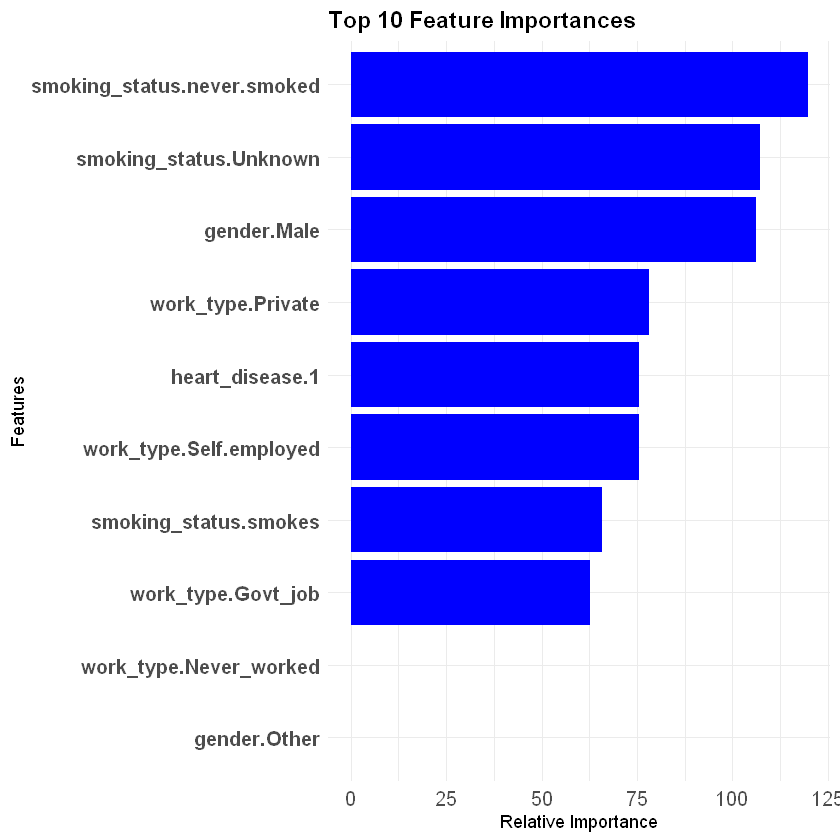

In [79]:
# Ekstrak nilai feature importance dari model ranger
importance_values <- final_model$finalModel$variable.importance

# Buat data frame dari nilai importance
importance_df <- data.frame(
  Feature = names(importance_values),
  Importance = importance_values
)

# Pilih 10 fitur teratas dengan pengurutan ascending (dari yang paling kecil ke yang paling besar)
top_imp <- importance_df[order(importance_df$Importance), ]
top_imp <- head(top_imp, 10)
top_imp$Feature <- factor(top_imp$Feature, levels = top_imp$Feature)

# Plot horizontal bar plot
ggplot(top_imp, aes(x = Importance, y = Feature)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Top 10 Feature Importances", 
       x = "Relative Importance", 
       y = "Features") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 12, face = "bold"),  # menambah ukuran teks sumbu-y
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 14, face = "bold"))


visualisasi 10 fitur teratas paling berpengaruh dalam model prediksi. 
Dari sudut pandang ilmu data, fitur **smoking_status.never.smoked** dan **smoking_status.Unknown** memiliki kepentingan relatif tertinggi, mengindikasikan bahwa status merokok (baik tidak pernah merokok maupun status yang tidak diketahui) adalah prediktor yang sangat kuat dalam model ini. Fitur **gender.Male** juga menunjukkan pengaruh yang signifikan. Selain itu, jenis pekerjaan **(work_type)** dan riwayat penyakit jantung **(heart_disease.1)** juga berkontribusi penting terhadap prediksi model. 

## Saving Model

In [80]:
saveRDS(final_model, file = "final_modelRF-stroke-klasificasion.rds")

# Kesimpulan

Analisis ini bertujuan untuk membangun model klasifikasi yang efektif, kemungkinan untuk memprediksi suatu kondisi atau kejadian (berdasarkan konteks analisis serupa sebelumnya). Tahapan awal melibatkan pemahaman karakteristik data melalui visualisasi boxplot, yang mengungkapkan distribusi fitur numerik seperti usia, tingkat glukosa rata-rata, dan BMI, serta mengidentifikasi adanya outlier terutama pada tingkat glukosa dan BMI. Analisis korelasi menunjukkan hubungan yang lemah antar fitur-fitur ini, kecuali korelasi positif sedang antara usia dan BMI.                   

Untuk mempersiapkan data untuk pemodelan, dilakukan serangkaian langkah preprocessing termasuk standard scaling fitur numerik, one-hot encoding fitur kategorikal, dan penanganan               

Beberapa model klasifikasi dievaluasi, termasuk Logistic Regression, Decision Tree Classifier, SVC, GaussianNB, dan RandomForestClassifier. Hasil evaluasi menunjukkan bahwa RandomForestClassifier secara konsisten memberikan performa terbaik, dengan akurasi tertinggi (sekitar 96.7%) dan AUC yang sangat baik (mendekati 0.996). Ini mengindikasikan kemampuan model yang sangat baik dalam membedakan antara kelas positif dan negatif dengan tingkat kesalahan yang rendah. SVC juga menunjukkan performa yang solid, meskipun sedikit di bawah RandomForestClassifier.                 

Analisis feature importance lebih lanjut dengan RandomForestClassifier mengungkapkan bahwa faktor-faktor terkait status merokok (terutama tidak pernah merokok dan status tidak diketahui), jenis kelamin (laki-laki), jenis pekerjaan, dan riwayat penyakit jantung merupakan prediktor yang paling kuat dalam model.                    


Secara keseluruhan, model **RandomForestClassifier** yang telah di-tuning menunjukkan potensi besar untuk digunakan dalam aplikasi prediktif. Tingkat akurasi dan metrik evaluasi lainnya yang tinggi memberikan keyakinan terhadap keandalannya.                          

Dengan demikian, analisis ini dapat menjadi landasan yang kuat untuk pengembangan lebih lanjut dalam mendukung diagnosis dini dan pengelolaan risiko stroke pada pasien. Model klasifikasi yang efektif, seperti RandomForestClassifier yang telah di-tuning, menawarkan kemungkinan untuk memprediksi kondisi pasien berdasarkan faktor-faktor risiko yang relevan. Dengan akurasi yang t                  